In [10]:
%matplotlib inline
%time from hikyuu.interactive import *

CPU times: total: 0 ns
Wall time: 1 ms


In [29]:
# 定义回测时间
start_date = Datetime(20200101)
end_date = Datetime(20240501)

# 指定分析对象
stk = sm['sh510050']
print(stk)
k = stk.get_kdata(Query(start_date, end_date))

Stock(SH, 510050, 上证50ETF, ETF, 1, 2005-02-23 00:00:00, +infinity)


In [30]:
k[-5:]

[KRecord(Datetime(202404240000), 2.4540, 2.4620, 2.4400, 2.4570, 1637772.2880, 6679206.0000),
 KRecord(Datetime(202404250000), 2.4530, 2.4720, 2.4450, 2.4660, 1344262.7840, 5467004.0000),
 KRecord(Datetime(202404260000), 2.4680, 2.5040, 2.4680, 2.4960, 2552948.7360, 10252533.0000),
 KRecord(Datetime(202404290000), 2.4940, 2.5300, 2.4890, 2.5110, 3201015.5520, 12745864.0000),
 KRecord(Datetime(202404300000), 2.5080, 2.5190, 2.4980, 2.5000, 1530682.3680, 6102266.0000)]

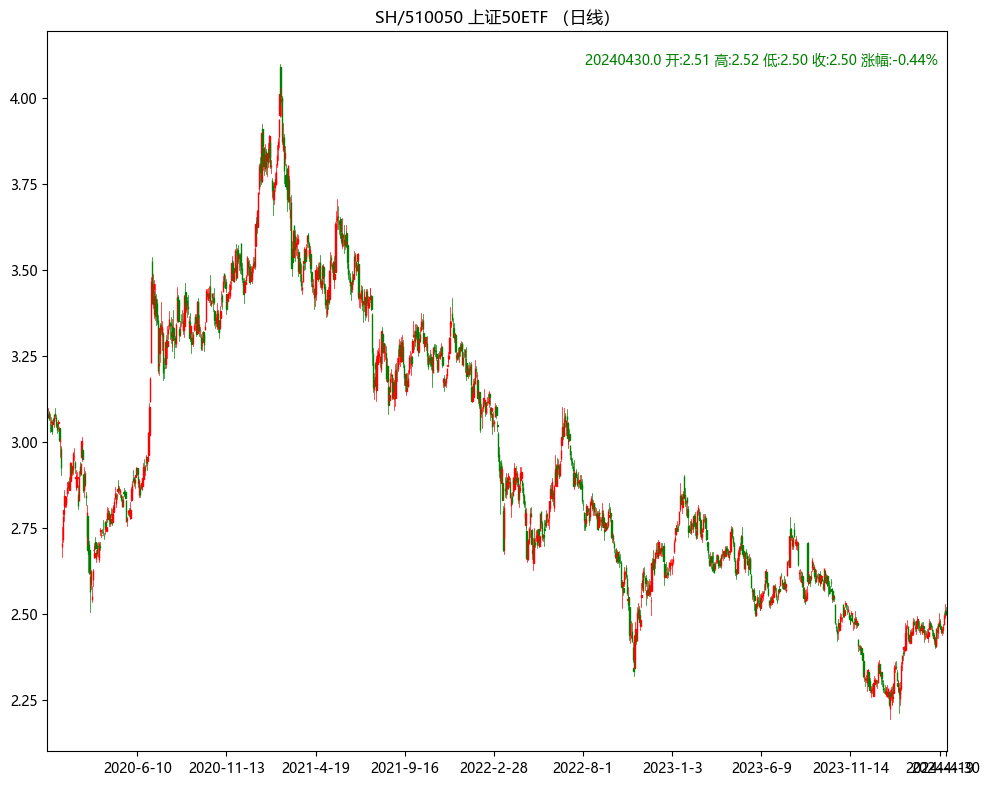

In [31]:
k.plot()

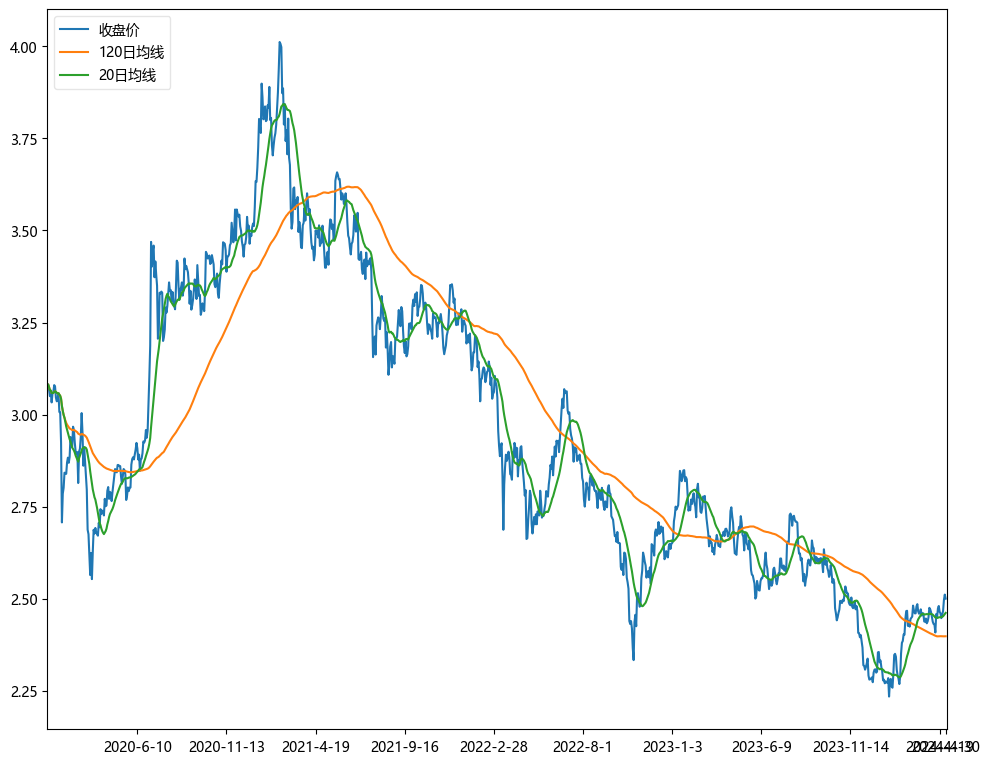

In [45]:
slow_n = 120
fast_n = 20
slow_ma = MA(CLOSE, slow_n)
fast_ma = MA(CLOSE, fast_n)

# 默认的 k 数据较多，绘制看不清，这里取当前最后的200个k线作为示意
k.close.plot(legend_on=True, label='收盘价')
slow_ma(k).plot(new=False, legend_on=True, label=f'{slow_n}日均线')
fast_ma(k).plot(new=False, legend_on=True, label=f'{fast_n}日均线')


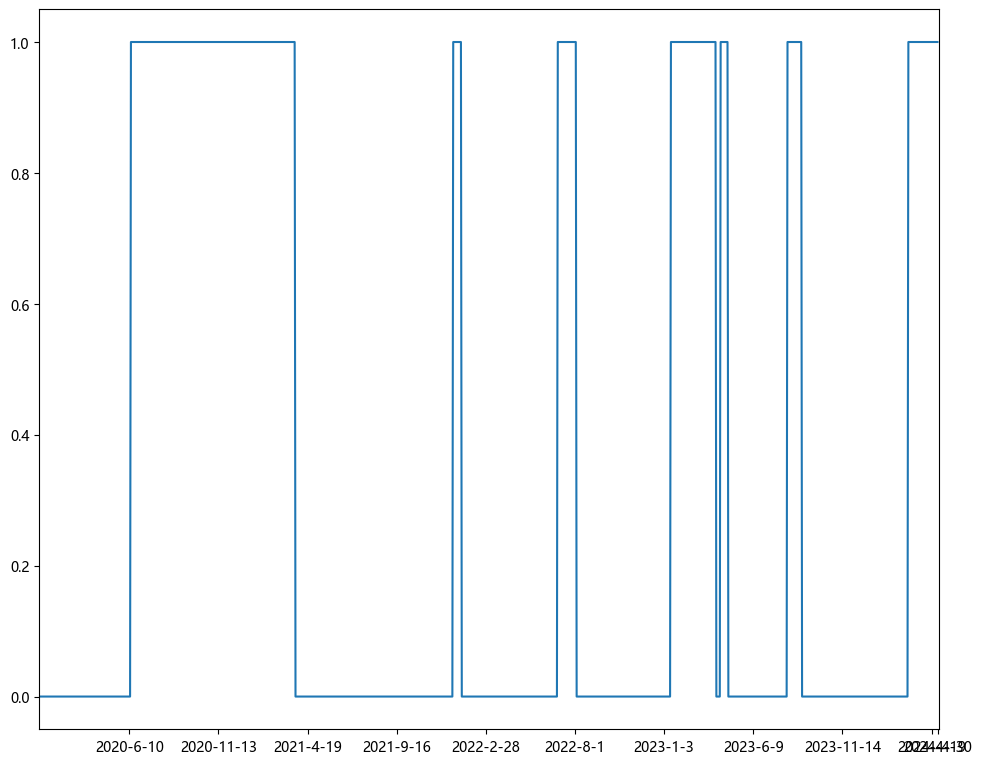

In [47]:
buy_ind = fast_ma > slow_ma
sell_ind = NOT(buy_ind)
buy_ind(k).plot()
# sell_ind(k).plot()

In [41]:
# 定义回测账户，并指定成本算法
my_tm = crtTM(start_date, init_cash=100000, cost_func=TC_FixedA2017())

# 创建信号指示器
my_sg = SG_Bool(buy_ind, sell_ind)

# 创建资金管理算法
my_mm = MM_Nothing()

# 移滑价差
my_sp = SP_FixedValue(0.05)

# 创建交易系统
my_sys = SYS_Simple(tm=my_tm, sg=my_sg, mm=my_mm, sp=my_sp)


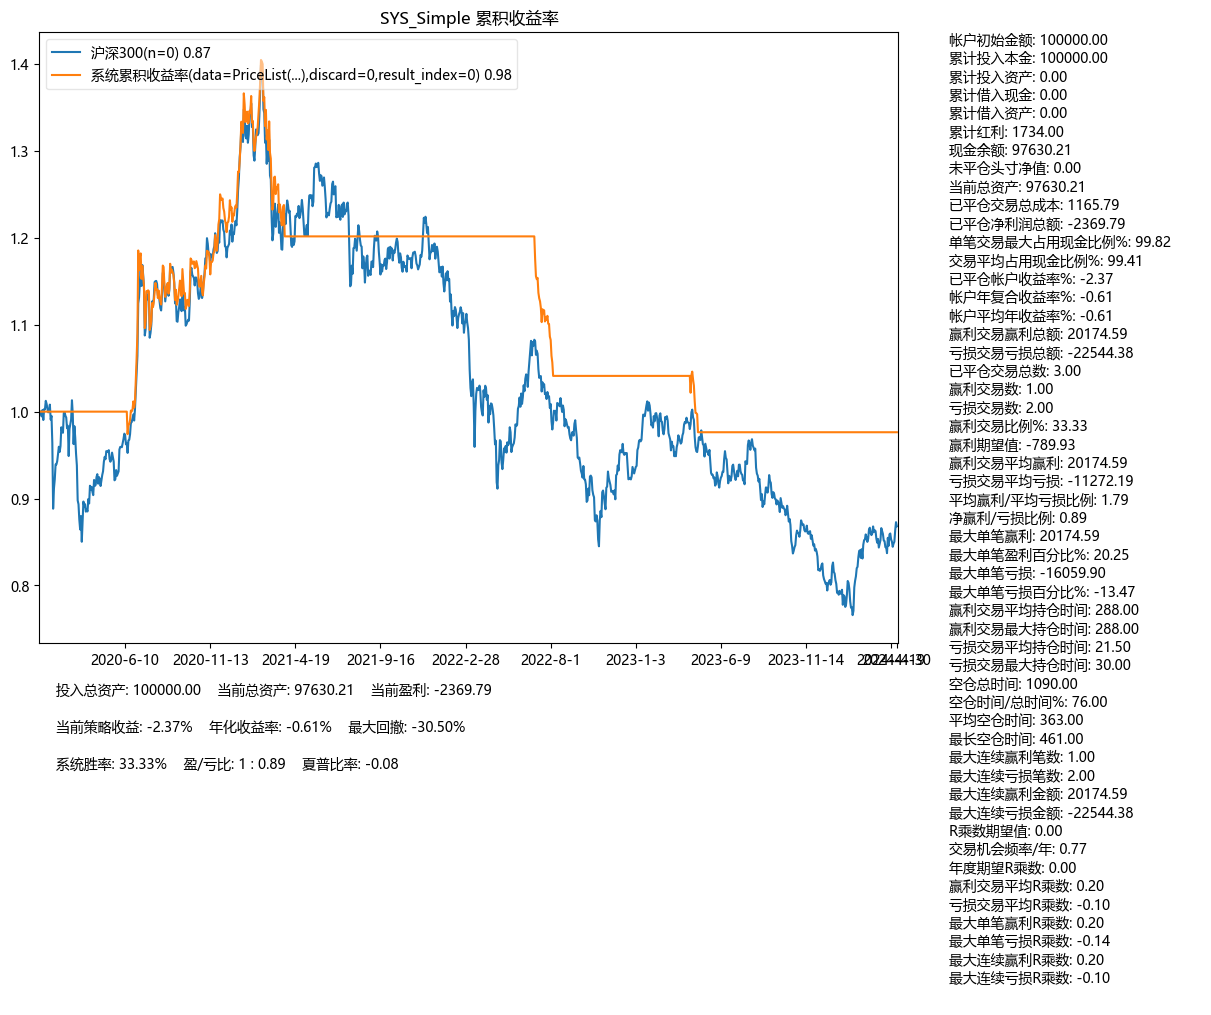

In [48]:
my_sys.run(stk, Query(start_date, end_date))
my_sys.performance()

In [49]:
stks = [s for s in sm if s.valid and s.type == constant.STOCKTYPE_A and s.start_datetime < start_date]
%time df = analysis_sys_list(stks, Query(start_date, end_date), my_sys)

CPU times: total: 31.2 ms
Wall time: 268 ms


In [50]:
df[df['当前总资产'] > 100000]

,证券代码,证券名称,累计投入本金,当前总资产,现金余额,未平仓头寸净值,赢利交易比例%,赢利交易数,亏损交易数
12,SH603277,银都股份,100000.0,130597.45,477.45,130120.0,33.333333,2.0,4.0
22,SH603970,中农立华,100000.0,159974.30,1278.30,158696.0,60.000000,3.0,2.0
25,SH603233,大参林,100000.0,120917.70,120917.70,0.0,50.000000,2.0,2.0
28,SH603260,合盛硅业,100000.0,232104.03,232104.03,0.0,20.000000,1.0,4.0
48,SH603976,正川股份,100000.0,156472.72,156472.72,0.0,16.666667,1.0,5.0
...,...,...,...,...,...,...,...,...,...
2743,SZ002843,泰嘉股份,100000.0,111593.07,111593.07,0.0,40.000000,2.0,3.0
2746,SZ002847,盐津铺子,100000.0,196118.35,5868.35,190250.0,40.000000,2.0,3.0
2753,SZ002866,传艺科技,100000.0,105564.68,105564.68,0.0,100.000000,2.0,0.0
2754,SZ002867,周大生,100000.0,111588.08,111588.08,0.0,50.000000,3.0,3.0


In [52]:
df[df['当前总资产'] <= 100000]

,证券代码,证券名称,累计投入本金,当前总资产,现金余额,未平仓头寸净值,赢利交易比例%,赢利交易数,亏损交易数
0,SH600605,汇通能源,100000.0,94265.45,2137.45,92128.0,66.666667,2.0,1.0
1,SZ000725,京东方Ａ,100000.0,100000.00,100000.00,0.0,0.000000,0.0,0.0
2,SH600354,敦煌种业,100000.0,76995.17,76995.17,0.0,0.000000,0.0,1.0
3,SH600606,绿地控股,100000.0,100000.00,100000.00,0.0,0.000000,0.0,0.0
4,SH600355,精伦电子,100000.0,100000.00,100000.00,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2787,SZ002950,奥美医疗,100000.0,36131.30,36131.30,0.0,0.000000,0.0,7.0
2788,SZ002951,*ST金时,100000.0,59248.96,59248.96,0.0,16.666667,1.0,5.0
2789,SZ002952,亚世光电,100000.0,79085.18,79085.18,0.0,20.000000,1.0,4.0
2790,SZ002953,日丰股份,100000.0,25015.08,25015.08,0.0,0.000000,0.0,8.0


In [57]:
stks = [s for s in sm if s.valid and s.type == constant.STOCKTYPE_ETF and s.start_datetime < start_date]
%time df = analysis_sys_list(stks, Query(start_date, end_date), my_sys)

CPU times: total: 0 ns
Wall time: 24.5 ms


In [58]:
df[df['当前总资产'] > 100000]

,证券代码,证券名称,累计投入本金,当前总资产,现金余额,未平仓头寸净值,赢利交易比例%,赢利交易数,亏损交易数
0,SH513100,纳指ETF,100000.0,102807.95,102807.95,0.0,100.000000,1.0,0.0
22,SZ159909,TMT50ETF,100000.0,102761.96,102761.96,0.0,50.000000,1.0,1.0
37,SZ159925,沪深300ETF南方,100000.0,109119.98,909.98,108210.0,0.000000,0.0,0.0
46,SZ159943,深证成指ETF,100000.0,120169.72,120169.72,0.0,75.000000,3.0,1.0
50,SH513600,恒生指数ETF,100000.0,102323.82,102323.82,0.0,100.000000,1.0,0.0
53,SH510130,中盘ETF,100000.0,104200.84,104200.84,0.0,40.000000,2.0,3.0
87,SH511220,城投债ETF,100000.0,109257.47,7297.47,101960.0,60.000000,3.0,2.0
92,SH510590,中证500ETF平安,100000.0,101458.72,101458.72,0.0,37.500000,3.0,5.0
93,SH510680,上证50ETF基金,100000.0,111738.30,48.30,111690.0,50.000000,1.0,1.0
100,SH510710,上证50ETF博时,100000.0,107595.24,107595.24,0.0,33.333333,1.0,2.0


In [59]:
df[df['当前总资产'] < 100000]

,证券代码,证券名称,累计投入本金,当前总资产,现金余额,未平仓头寸净值,赢利交易比例%,赢利交易数,亏损交易数
1,SH510050,上证50ETF,100000.0,97630.21,97630.21,0.0,33.333333,1.0,2.0
6,SZ159919,沪深300ETF,100000.0,67196.81,67196.81,0.0,0.000000,0.0,6.0
15,SH510020,超大盘ETF,100000.0,88417.78,385.78,88032.0,0.000000,0.0,2.0
17,SH510850,工银上证50ETF,100000.0,91011.73,789.73,90222.0,0.000000,0.0,1.0
20,SH512500,中证500ETF华夏,100000.0,93484.28,93484.28,0.0,40.000000,2.0,3.0
23,SZ159908,创业板ETF博时,100000.0,90230.39,90230.39,0.0,50.000000,1.0,1.0
24,SZ159910,基本面120ETF,100000.0,94089.32,94089.32,0.0,0.000000,0.0,1.0
25,SH510630,消费30ETF,100000.0,89416.50,89416.50,0.0,0.000000,0.0,1.0
29,SZ159901,深证100ETF,100000.0,85490.36,320.36,85170.0,25.000000,1.0,3.0
35,SZ159922,中证500ETF,100000.0,84220.71,84220.71,0.0,37.500000,3.0,5.0
